In [19]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS') 
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [20]:
%autosave 0

Autosave disabled


In [21]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [23]:
ietf_v4 = "./data/VM//ietf/ietf_handshake.csv"
ietf_v6 = "./data/VM//ietf/ietf_handshake_v6.csv"
ietf_0rtt = "./data/VM//ietf/ietf_handshake_0rtt.csv"

In [24]:
v4 = pd.read_csv(ietf_v4,',')
v6 = pd.read_csv(ietf_v6,',')
zrtt = pd.read_csv(ietf_0rtt,',')

In [25]:
v4 = v4.dropna()
v6 = v6.dropna()
zrtt = zrtt.dropna()

In [26]:
v4['ConnectionEstablishmentTime'] = v4['end_time'] - v4['start_time']

In [27]:
v6['ConnectionEstablishmentTime'] = v6['end_time'] - v6['start_time']

In [28]:
zrtt['ConnectionEstablishmentTime'] = zrtt['end_time'] - zrtt['start_time']
zrtt['0rttConnectionEstablishmentTime'] = zrtt['0rtt_end_time'] - zrtt['0rtt_start_time']

In [29]:
zrtt['difference'] = ((zrtt['ConnectionEstablishmentTime'] - zrtt['0rttConnectionEstablishmentTime'])/zrtt['ConnectionEstablishmentTime'])*100

In [30]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [31]:
x1 = Cdf.MakeCdfFromList(v4['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(v6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(zrtt['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(zrtt['0rttConnectionEstablishmentTime'].values)

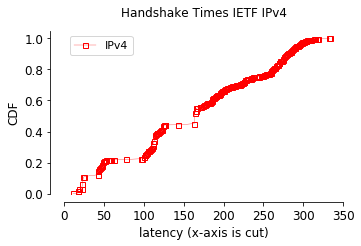

In [32]:
fig = plt.figure(figsize = (5,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 350])
ax.set_xscale('linear')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)
plt.legend(['IPv4'], fontsize=11, loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))
ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.title('Handshake Times IETF IPv4', fontsize=12, y=1.05)
plt.savefig('handshake_times_ietf_ipv4.png', format='png', bbox_inches='tight')

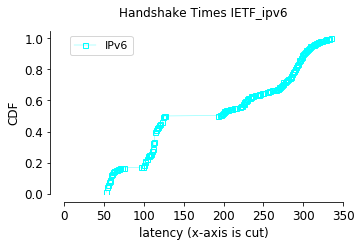

In [33]:
fig = plt.figure(figsize = (5,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 350])
ax.set_xscale('linear')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)
plt.legend(['IPv6'], fontsize=11, loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))
ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.title('Handshake Times IETF_ipv6', fontsize=12, y=1.05)
plt.savefig('handshake_times_ietf_ipv6.png', format='png', bbox_inches='tight')

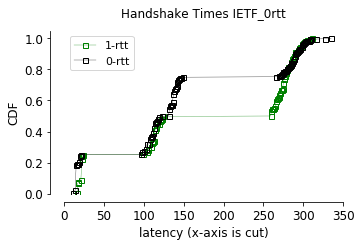

In [34]:
fig = plt.figure(figsize = (5,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')
ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 350])
ax.set_xscale('linear')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)
plt.legend(['1-rtt', '0-rtt'], fontsize=11, loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))
ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.title('Handshake Times IETF_0rtt', fontsize=12, y=1.05)
plt.savefig('handshake_times_ietf_0rtt.png', format='png', bbox_inches='tight')

In [35]:
print("0-rtt provides an improvement of %.3f %% over 1-rtt" % zrtt['difference'].mean())

0-rtt provides an improvement of 18.177 % over 1-rtt
